In [1]:
import json
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.distributions import ECDF

In [2]:
log_dir = Path("logs/")
metrics = [
    ("Mean Square Error", "loss"),
    ("Mean Absolute Error", "mean_absolute_error"),
    ("Validation Mean Square Error", "val_loss"),
    ("Validation Mean Absolute Error", "val_mean_absolute_error"),
]
models = [
    ("GNN", "gnn"),
    ("iGNNition", "experiment"),
]

In [3]:
runs = [_dir for _dir in log_dir.glob("*") if _dir.is_dir()]

In [4]:
stats = {
    name: pd.DataFrame([
        [json.load(open(run / "history.json", "r"))[metric][-1] for _, metric in metrics]
        for run in runs if model in run.name  
    ], columns=([metric for _, metric in metrics]))
    for name, model in models
}

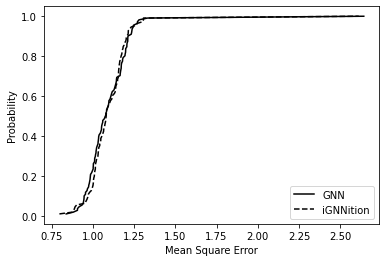

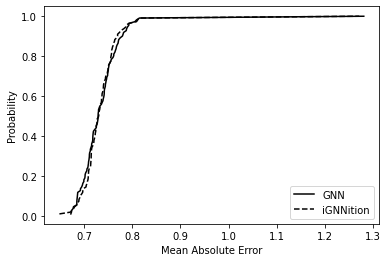

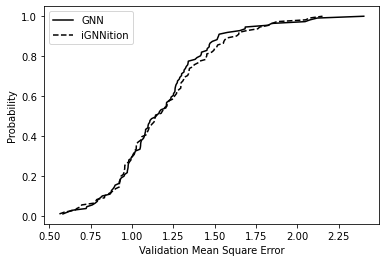

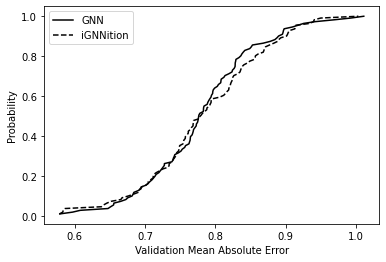

In [5]:
for name, metric in metrics:
    ecdf_gnn = ECDF(stats["GNN"][metric].values)
    ecdf_ignnition = ECDF(stats["iGNNition"][metric].values)
    plt.figure()
    plt.plot(ecdf_gnn.x, ecdf_gnn.y, "k-", label="GNN")
    plt.plot(ecdf_ignnition.x, ecdf_ignnition.y, "k--", label="iGNNition")
    plt.legend()
    plt.xlabel(name)
    plt.ylabel("Probability")
    plt.show()